#### Loading packages

In [1]:
import numpy as np
import warnings

from matplotlib import pyplot as plt
from matplotlib import cm
from scipy.special import jn, yn, sph_harm, factorial
from SettingPLOTs import *

warnings.filterwarnings('ignore')

π = np.pi

## The modal function

$$F_\ell(\rho) = \frac{y_{\ell-1}(n_2\rho)}{y_\ell(n_2\rho)} - m~\frac{j_{\ell-1}(n_1\rho)}{j_\ell(n_1\rho)} - \frac{\ell}{\rho}\left[\frac{1}{n_2} - m\frac{1}{n_1}\right]$$

where $m=n_1/n_2$ for TE and $m=n_2/n_1$ for TM. This equation depend of the variable $ρ=κR=2πR/λ$

<hr />

### Defining useful functions

In [2]:
# Spherical Bessel functions
#---------------------------
sph_jn = lambda l,z: np.sqrt(π/2/z)*jn(l+0.5,z)
sph_yn = lambda l,z: np.sqrt(π/2/z)*yn(l+0.5,z)

# Riccati-Bessel functions
#-------------------------
ψ = lambda l, z: z*sph_jn(l,z)
χ = lambda l, z: -z*sph_yn(l,z)

#### Considering the case of a microsphere ($n_1=n$) with radio $R$ involved by air ($n_2=1$):

$$F^\text{TE}_\ell(\rho) = \frac{y_{\ell-1}(\rho)}{y_\ell(\rho)} - n~\frac{j_{\ell-1}(n\rho)}{j_\ell(n\rho)}$$

$$F^\text{TM}_\ell(\rho) = \frac{y_{\ell-1}(\rho)}{y_\ell(\rho)} - \frac{1}{n}~\frac{j_{\ell-1}(n\rho)}{j_\ell(n\rho)} - \frac{\ell}{\rho}\left[1 - \frac{1}{n^2}\right]$$

In [3]:
# For TE polarization
#--------------------
mode = 'TE-Modes'
F = lambda l, ρ, n: sph_yn(l-1,ρ)/sph_yn(l,ρ) - n*sph_jn(l-1,n*ρ)/sph_jn(l,n*ρ)

# For TM polarization
#--------------------
# mode = 'TM-Modes'
# F = lambda l, ρ, n: sph_yn(l-1,ρ)/sph_yn(l,ρ) - (1/n)*sph_jn(l-1,n*ρ)/sph_jn(l,n*ρ) - (l/ρ)*(1-1/n**2)

#### Microsphere properties:

In [4]:
n = 1.45 # Silica
R = 15 # Microsphere Radio in μm
ndots = 1e3 # Increase this value for higher precision

## Sweeping the angular mode number ($\ell$)
<hr />

In this case, we will set the wavelength $λ_0$ (or $ρ_0$) and sweep the angular mode number ($ℓ$)

In [5]:
λ0 = 1.55 # in μm
k0 = 2*π/λ0
ρ0 = k0*R
lmin, lmax = ρ0-1/2, n*ρ0-1/2
l = np.linspace(lmin, lmax, ndots)

#### Finding roots
Because $ρ_0$ is fixed, the roots will be the values of $ℓ$ such that $F_ℓ(ρ_0)=0$.

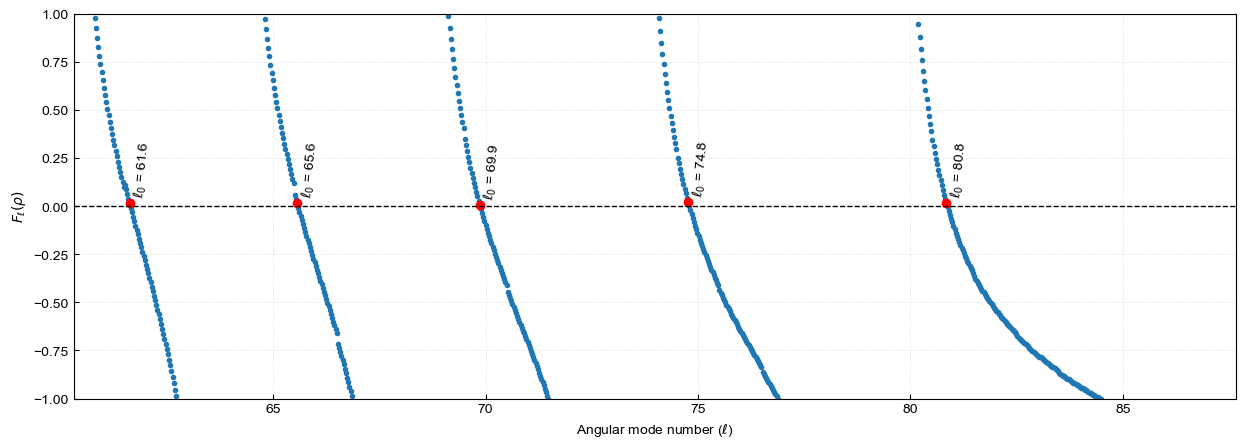

In [6]:
y = F(l,ρ0,n)
zero_crossings = np.where(np.diff(np.signbit(y)))[0]
zero_crossings = zero_crossings[np.where(abs(y[zero_crossings])<1)[0]]

plt.figure(figsize=(15,5))
plt.scatter(l, F(l, ρ0, n), marker='.')
plt.hlines(0, xmin=lmin, xmax=lmax, linestyles='--', lw=1)
plt.scatter(l[zero_crossings], y[zero_crossings], c='r')

for ii in zero_crossings:
    plt.annotate(r'$\ell_0$ = {:.1f}'.format(l[ii]), xy=(l[ii], y[ii]), xytext=(l[ii]+0.05, y[ii]+0.05), rotation=85,)

plt.ylim(-1,1)
plt.xlabel(r'Angular mode number ($\ell$)')
plt.ylabel(r'$F_\ell(\rho)$')
plt.show()

#### Plotting the radial distribution along $r$ for $q$ = 1, 2 and 3

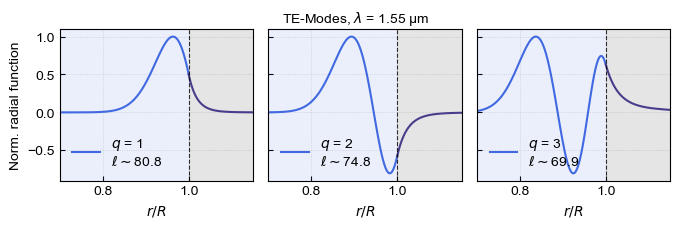

In [7]:
fig, axs = plt.subplots(1, 3, figsize=cm2inch(20,5), sharey=True)
plt.subplots_adjust(wspace=0.08)

rmin, rmax = 0.7*R, 1.15*R
ymin, ymax = -0.9, 1.1

r1 = np.linspace(rmin, R, 1e2) # radial distance r<=R
r2 = np.linspace(R, rmax, 1e2) # radial distance r>=R

for ii in range(3): # For the 3 lastes/highest ℓ's values
    l0 = l[zero_crossings][-ii-1]
    B = ψ(l0,k0*R*n)/χ(l0,k0*R)
    ψmax = max(ψ(l0,k0*r1*n))
    legend = r'$q$ = {}'.format(ii+1) + '\n' +  r'$\ell \sim${:.1f}'.format(l0)

    axs[ii].plot(r1/R, ψ(l0,k0*r1*n)/ψmax, ls='-', label=legend, c='royalblue') # Radial distribuition r<=R
    axs[ii].plot(r2/R, B*χ(l0,k0*r2)/ψmax, ls='-', c='DarkSlateBlue') # Radial distribuition r>=R
    axs[ii].axvline(x=1, ls='--', color='k', lw=0.8, alpha=0.8)
    axs[ii].set_xlabel(r'$r / R$')
    axs[ii].legend(loc='lower left', frameon=False)
    axs[ii].fill_between(r1/R, ymin, ymax, facecolor='royalblue', alpha=0.1)    
    axs[ii].fill_between(r2/R, ymin, ymax, facecolor='k', alpha=0.1)    

# axs[0].set_ylabel(r'$u_\ell(r)$ / $u_\ell^{max}(r)$')
axs[0].set_ylabel(r'Norm. radial function')
fig.suptitle(mode + r', $\lambda$ = {} μm'.format(λ0), fontsize=10)

plt.show()

## Sweeping $ρ=κR$
This case is similar to sweep the frequency of a tunable laser
<hr />

In [8]:
l0 = int(round(l[zero_crossings][-1])) # Based in the above analysis
ρmin, ρmax = (l0+1/2)/n, l0+1/2
ρ = np.linspace(ρmin, ρmax, ndots)

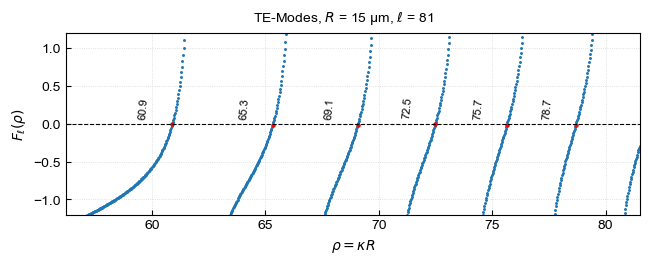

In [10]:
y = F(l0,ρ,n)
zero_crossings = np.where(np.diff(np.signbit(y)))[0]
zero_crossings = zero_crossings[np.where(abs(y[zero_crossings])<1)[0]]

plt.figure(figsize=cm2inch(18.8,6))
plt.scatter(ρ, F(l0, ρ, n), marker='.', s=5)
plt.hlines(0, xmin=ρmin, xmax=ρmax, linestyles='--', lw=0.8)
plt.scatter(ρ[zero_crossings], y[zero_crossings], s=5, c='r')

for ii in zero_crossings:
    plt.annotate(r'{:.1f}'.format(ρ[ii]), xy=(ρ[ii], y[ii]), xytext=(ρ[ii]-1.5, y[ii]+0.1), rotation=85, fontsize=8,)

# plt.xlim(190, 271)
plt.ylim(-1.2,1.2)
plt.xlabel(r'$\rho = \kappa R$')
plt.ylabel(r'$F_\ell(\rho)$')
plt.suptitle(mode + r', $R$ = {} μm, $\ell$ = {}'.format(R, l0), fontsize=10)

# plt.savefig('Figures/Modal-Function-Roots-{}.svg'.format(mode))
plt.show()

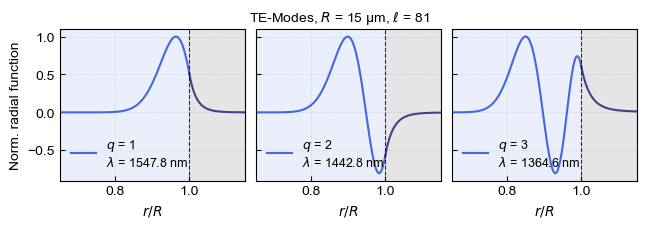

In [11]:
n_roots = 3
fig, axs = plt.subplots(1, n_roots, figsize=cm2inch(18.9,5), sharey=True)
plt.subplots_adjust(wspace=0.06)

rmin, rmax = 0.65*R, 1.15*R
ymin, ymax = -0.9, 1.1

r1 = np.linspace(rmin, R, 1e2) # radial distance r<=R
r2 = np.linspace(R, rmax, 1e2) # radial distance r>=R

for ii in range(n_roots): # For the n_roots lowest ρ's values
    k0 = ρ[zero_crossings][ii]/R
    B = ψ(l0,k0*R*n)/χ(l0,k0*R)
    ψmax = max(ψ(l0,k0*r1*n))
    legend = r'$q$ = {}'.format(ii+1) + '\n' +  r'$\lambda$ = {:.1f} nm'.format(1e3*2*π/k0)

    axs[ii].plot(r1/R, ψ(l0,k0*r1*n)/ψmax, ls='-', label=legend, c='royalblue') # Radial distribuition r<=R
    axs[ii].plot(r2/R, B*χ(l0,k0*r2)/ψmax, ls='-', c='DarkSlateBlue') # Radial distribuition r>=R
    axs[ii].axvline(x=1, ls='--', color='k', lw=0.8, alpha=0.8)
    axs[ii].set_xlabel(r'$r / R$')
    axs[ii].legend(loc='lower left', frameon=False, fontsize=9)
    axs[ii].fill_between(r1/R, ymin, ymax, facecolor='royalblue', alpha=0.1)    
    axs[ii].fill_between(r2/R, ymin, ymax, facecolor='k', alpha=0.1)    

# axs[0].set_ylabel(r'$u_\ell(r)$ / $u_\ell^{max}(r)$')
axs[0].set_ylabel(r'Norm. radial function')
fig.suptitle(mode + r', $R$ = {} μm, $\ell$ = {}'.format(R, l0), fontsize=10)
# plt.savefig('Figures/Radial-Functions-{}.svg'.format(mode))

plt.show()

#### Plotting the intensity profile of these modes

Limited to $\ell$ $\leq$ 86

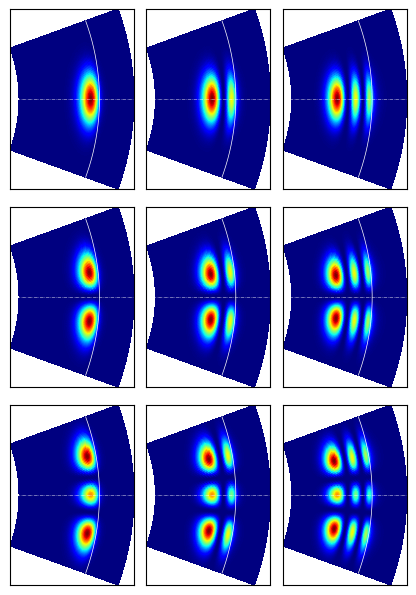

In [18]:
m_roots = 3 # Affect the azimuthal mode number
fig, axs = plt.subplots(m_roots, n_roots, figsize=cm2inch(13,19), sharey=True)
plt.subplots_adjust(wspace=0.1, hspace=0.1)

for ll in range(m_roots):
    for kk in range(n_roots):

        k0 = ρ[zero_crossings][kk]/R
        B = ψ(l0,k0*R*n)/χ(l0,k0*R)

        m = l0-ll # fundamental mode m = ℓ
        ϕ = 0
        θ_order = int(2e2) # Increase for higher ressolution
        r_order = int(2e2) # Increase for higher ressolution
        θ = np.linspace(7*π/18, 11*π/18, θ_order)
        r = np.linspace(rmin, rmax, r_order)

        M = np.zeros((θ_order, r_order))
        for ii in range(len(θ)):
            for jj in range(len(r)):
                if r[jj]<=R:
                    M[ii][jj] = np.abs(ψ(l0,k0*r[jj]*n)*sph_harm(m,l0,0,θ[ii]))**2
                else:
                    M[ii][jj] = np.abs(B*χ(l0,k0*r[jj])*sph_harm(m,l0,0,θ[ii]))**2

        theta, radial = np.meshgrid(θ, r)
        x = radial*np.sin(theta)
        y = radial*np.cos(theta)
        M_min, M_max = M.min(), M.max()

        cmp = axs[ll,kk].pcolormesh(x/R, y/R, np.transpose(M), cmap='jet', vmin=M_min, vmax=M_max, rasterized=True)
        axs[ll,kk].plot(np.sin(θ), np.cos(θ), 'w', lw=0.5, alpha=1)
        axs[ll,kk].axhline(y=0, ls='-.', color='w', lw=0.4, alpha=0.8)
        axs[ll,kk].set(xticks=([]), yticks=([]))

# plt.savefig('Figures/WGM-intensity-profiles.svg')
plt.show()